回归任务

# 回调函数

In [28]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
print(housing.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [5]:
print(housing.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [6]:
housing.data.shape

(20640, 8)

In [7]:
# 切割数据
# 训练数据, 验证集, 测试数据
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state=7)
# 从x_train_all中切割出训练数据和校验数据
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state=11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [8]:
# 标准化处理
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [9]:
x_train.shape

(11610, 8)

In [10]:
# 定义网络
model = keras.models.Sequential([
    # input_dim, input_shape一定要是元组
    keras.layers.Dense(32, activation='relu', input_shape=x_train.shape[1:]),
    keras.layers.Dense(1)
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [12]:
32*8++32

288

In [13]:
32*1+1

33

In [14]:
# 配置
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['mse'])

回调函数

In [18]:
log_dir = './callbacks'
if not os.path.exists(log_dir):
    os.mkdir(log_dir)
    
output_model_file = os.path.join(log_dir, 'model.h5')
    
callbacks = [
    keras.callbacks.TensorBoard(log_dir),
    keras.callbacks.ModelCheckpoint(output_model_file, save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)
]
history = model.fit(x_train_scaled, y_train, 
          validation_data=(x_valid_scaled, y_valid), 
          epochs=100,
          callbacks=callbacks
)

Epoch 1/100
363/363 [==============================] - 2s 3ms/step - loss: 14.6949 - mse: 14.6949 - val_loss: 0.6277 - val_mse: 0.6277
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4770 - mse: 0.4770 - val_loss: 0.4404 - val_mse: 0.4404
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4069 - mse: 0.4069 - val_loss: 0.4152 - val_mse: 0.4152
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3943 - mse: 0.3943 - val_loss: 0.3965 - val_mse: 0.3965
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3931 - mse: 0.3931 - val_loss: 0.3915 - val_mse: 0.3915
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3812 - mse: 0.3812 - val_loss: 0.3854 - val_mse: 0.3854
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3773 - mse: 0.3773 - val_loss: 0.3783 - val_mse: 0.3783
Epoch 8/100
363/363 [==============================] - 1s 3ms/step 

In [19]:
history.history

{'loss': [14.694876670837402,
  0.47696059942245483,
  0.4068569540977478,
  0.3943221867084503,
  0.3930814266204834,
  0.381224125623703,
  0.377273291349411,
  0.37304922938346863,
  0.3687293529510498,
  0.36580148339271545,
  0.3632049858570099,
  0.35958147048950195,
  0.3586646616458893,
  0.3563074469566345,
  0.35495859384536743,
  0.35436445474624634,
  0.36230704188346863,
  0.35359159111976624,
  0.35035237669944763,
  0.35244977474212646,
  0.3563433289527893,
  0.3486056327819824,
  0.3505166172981262,
  0.3453802466392517,
  0.3458230197429657,
  0.3441949486732483,
  0.35003048181533813,
  0.3418358862400055,
  0.34627029299736023,
  0.3448132574558258,
  0.34020814299583435,
  0.35045126080513,
  0.34613752365112305,
  0.34947940707206726,
  0.3384505808353424,
  0.33564940094947815,
  0.33821359276771545,
  0.34533217549324036,
  0.33651039004325867,
  0.33764520287513733,
  0.33282148838043213,
  0.3379615247249603,
  0.3316269814968109,
  0.3341562747955322,
  0.329

## 定义画图的函数

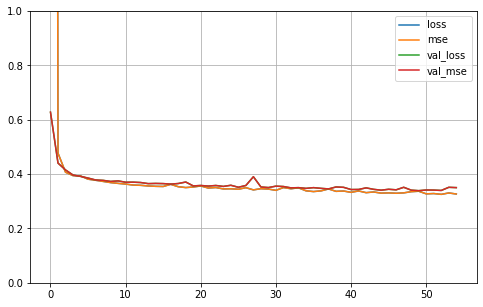

In [20]:
# 定义画图的函数
def plot_learning_curves(history):
    pandas.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
plot_learning_curves(history)

# 神经网络实现回归任务

In [ ]:
housing = fetch_california_housing()
print(housing.DESCR)
# 切割数据
# 训练数据, 验证集, 测试数据
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state=7)
# 从x_train_all中切割出训练数据和校验数据
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state=11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)
# 标准化处理
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

# 定义网络
model = keras.models.Sequential([
    # input_dim, input_shape一定要是元组
    keras.layers.Dense(32, activation='relu', input_shape=x_train.shape[1:]),
    keras.layers.Dense(1)
])

# 配置
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['mse'])

callbacks = []
history = model.fit(x_train_scaled, y_train, 
          validation_data=(x_valid_scaled, y_valid), 
          epochs=20)


# 定义画图的函数
def plot_learning_curves(history):
    pandas.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
plot_learning_curves(history)

# 实现wide&deep模型

In [ ]:
housing = fetch_california_housing()
print(housing.DESCR)
# 切割数据
# 训练数据, 验证集, 测试数据
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state=7)
# 从x_train_all中切割出训练数据和校验数据
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state=11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)
# 标准化处理
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

# 定义网络
# 函数式API
# 每一层结构都可以当成一个函数去使用.
input = keras.layers.Input(shape=x_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)

# wide和deep模型用相同的输入数据
concat = keras.layers.concatenate([input, hidden2])
output = keras.layers.Dense(1)(concat)

# 包装成一个model
model = keras.models.Model(inputs=[input], outputs=output)

In [48]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 30)           270         input_5[0][0]                    
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 30)           930         dense_12[0][0]                   
__________________________________________________________________________________________________
concatenate_4 (Concatenate)     (None, 38)           0           input_5[0][0]                    
                                                                 dense_13[0][0]             

In [ ]:
# 配置
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [50]:
history = model.fit(x_train_scaled, y_train, 
          validation_data=(x_valid_scaled, y_valid), 
          epochs=20)

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.5901 - mse: 1.5901 - val_loss: 0.5379 - val_mse: 0.5379
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4846 - mse: 0.4846 - val_loss: 0.4228 - val_mse: 0.4228
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3971 - mse: 0.3971 - val_loss: 0.3958 - val_mse: 0.3958
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3710 - mse: 0.3710 - val_loss: 0.4210 - val_mse: 0.4210
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4016 - mse: 0.4016 - val_loss: 0.3677 - val_mse: 0.3677
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3444 - mse: 0.3444 - val_loss: 0.3657 - val_mse: 0.3657
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3454 - mse: 0.3454 - val_loss: 0.3539 - val_mse: 0.3539
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.

In [ ]:
history.history

In [ ]:
# 定义画图的函数
def plot_learning_curves(history):
    pandas.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
plot_learning_curves(history)

# 多输入wide&deep模型

In [22]:
#多输入
# 定义两个输入
input_wide = keras.layers.Input(shape=[5])
input_deep = keras.layers.Input(shape=[6])

hidden1 = keras.layers.Dense(30, activation='relu')(input_deep)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_wide, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_wide, input_deep], outputs=[output])


In [23]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 dense_2 (Dense)                (None, 30)           210         ['input_2[0][0]']                
                                                                                                  
 input_1 (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 30)           930         ['dense_2[0][0]']                
                                                                                              

In [24]:
# 配置
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [25]:
# 对输入数据做修改
x_train_scaled_wide = x_train_scaled[:, :5]
x_train_scaled_deep = x_train_scaled[:, 2:]
x_valid_scaled_wide = x_valid_scaled[:, :5]
x_valid_scaled_deep = x_valid_scaled[:, 2:]
x_test_scaled_wide = x_test_scaled[:, :5]
x_test_scaled_deep = x_test_scaled[:, 2:]

In [26]:
x_train_scaled_deep.shape

(11610, 6)

In [27]:
history = model.fit([x_train_scaled_wide, x_train_scaled_deep], y_train,
                    validation_data=([x_valid_scaled_wide, x_valid_scaled_deep], y_valid),
         epochs=20)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.4703 - mse: 1.4703 - val_loss: 0.6273 - val_mse: 0.6273
Epoch 2/20
363/363 [==============================] - 0s 996us/step - loss: 0.5058 - mse: 0.5058 - val_loss: 0.4762 - val_mse: 0.4762
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4301 - mse: 0.4301 - val_loss: 0.4207 - val_mse: 0.4207
Epoch 4/20
363/363 [==============================] - 0s 986us/step - loss: 0.3957 - mse: 0.3957 - val_loss: 0.3975 - val_mse: 0.3975
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3767 - mse: 0.3767 - val_loss: 0.3819 - val_mse: 0.3819
Epoch 6/20
363/363 [==============================] - 0s 964us/step - loss: 0.3633 - mse: 0.3633 - val_loss: 0.3631 - val_mse: 0.3631
Epoch 7/20
363/363 [==============================] - 0s 990us/step - loss: 0.3519 - mse: 0.3519 - val_loss: 0.3647 - val_mse: 0.3647
Epoch 8/20
363/363 [==============================] - 0s 981us/step 

In [36]:
pd.DataFrame(history.history).iloc[:,:2]

,loss,mse
0,1.470269,1.470269
1,0.505791,0.505791
2,0.430123,0.430123
3,0.395658,0.395658
4,0.376668,0.376668
5,0.363265,0.363265
6,0.351872,0.351872
7,0.347890,0.347890
8,0.377896,0.377896
9,0.362953,0.362953


In [39]:
pd.DataFrame(history.history)

,loss,mse,val_loss,val_mse
0,1.470269,1.470269,0.627257,0.627257
1,0.505791,0.505791,0.476242,0.476242
2,0.430123,0.430123,0.420734,0.420734
3,0.395658,0.395658,0.397538,0.397538
4,0.376668,0.376668,0.381944,0.381944
5,0.363265,0.363265,0.363091,0.363091
6,0.351872,0.351872,0.364721,0.364721
7,0.347890,0.347890,0.355659,0.355659
8,0.377896,0.377896,0.364001,0.364001
9,0.362953,0.362953,0.342206,0.342206


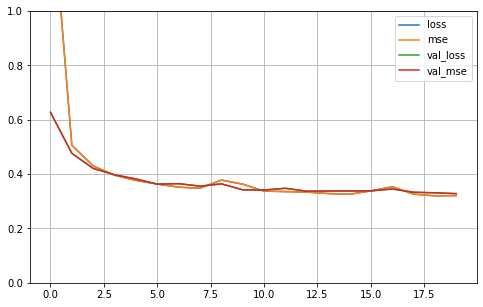

In [38]:
# 定义画图的函数
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
plot_learning_curves(history)

# 多输出wide&deep模型

In [40]:
# 多输出
# 定义两个输入
input_wide = keras.layers.Input(shape=[5])
input_deep = keras.layers.Input(shape=[6])

hidden1 = keras.layers.Dense(30, activation='relu')(input_deep)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_wide, hidden2])
output = keras.layers.Dense(1)(concat)
output2 = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs=[input_wide, input_deep], outputs=[output, output2])

In [41]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 30)           210         ['input_4[0][0]']                
                                                                                                  
 input_3 (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 30)           930         ['dense_5[0][0]']                
                                                                                            

In [42]:
# 配置
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [43]:
# 对输入数据做修改
# a[:, 5:] 为什么不是a[5:]呢 
x_train_scaled_wide = x_train_scaled[:, :5]
x_train_scaled_deep = x_train_scaled[:, 2:]
x_valid_scaled_wide = x_valid_scaled[:, :5]
x_valid_scaled_deep = x_valid_scaled[:, 2:]
x_test_scaled_wide = x_test_scaled[:, :5]
x_test_scaled_deep = x_test_scaled[:, 2:]
history = model.fit([x_train_scaled_wide, x_train_scaled_deep], [y_train, y_train],
                    validation_data=([x_valid_scaled_wide, x_valid_scaled_deep], [y_valid, y_valid]),
         epochs=20)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 3.2021 - dense_7_loss: 1.7281 - dense_8_loss: 1.4740 - dense_7_mse: 1.7281 - dense_8_mse: 1.4740 - val_loss: 1.5375 - val_dense_7_loss: 0.7562 - val_dense_8_loss: 0.7813 - val_dense_7_mse: 0.7562 - val_dense_8_mse: 0.7813
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 1.2450 - dense_7_loss: 0.6076 - dense_8_loss: 0.6374 - dense_7_mse: 0.6076 - dense_8_mse: 0.6374 - val_loss: 1.2004 - val_dense_7_loss: 0.5777 - val_dense_8_loss: 0.6227 - val_dense_7_mse: 0.5777 - val_dense_8_mse: 0.6227
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 1.0548 - dense_7_loss: 0.4981 - dense_8_loss: 0.5568 - dense_7_mse: 0.4981 - dense_8_mse: 0.5568 - val_loss: 1.0507 - val_dense_7_loss: 0.4866 - val_dense_8_loss: 0.5640 - val_dense_7_mse: 0.4866 - val_dense_8_mse: 0.5640
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.9623 - dense_7_loss: 0.4409 - dense_

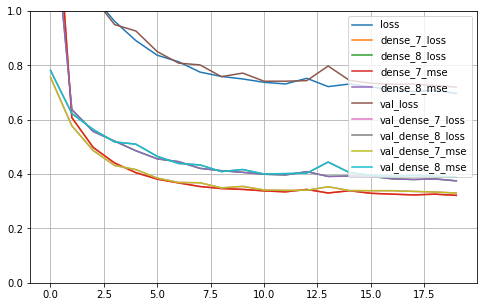

In [44]:
# 定义画图的函数
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
plot_learning_curves(history)

In [45]:
model.evaluate([x_test_scaled_wide, x_test_scaled_deep], [y_test, y_test])

162/162 [==============================] - 0s 895us/step - loss: 0.7091 - dense_7_loss: 0.3304 - dense_8_loss: 0.3786 - dense_7_mse: 0.3304 - dense_8_mse: 0.3786


[0.7090818881988525,
 0.33043476939201355,
 0.3786468803882599,
 0.33043476939201355,
 0.3786468803882599]

In [46]:
model.predict([x_test_scaled_wide, x_test_scaled_deep])

162/162 [==============================] - 0s 743us/step


[array([[2.0318017],
        [2.8073246],
        [2.8324325],
        ...,
        [1.7291294],
        [1.420109 ],
        [2.6994917]], dtype=float32),
 array([[1.9707758],
        [2.828139 ],
        [3.0049288],
        ...,
        [1.7571527],
        [1.3149208],
        [2.541722 ]], dtype=float32)]

# 子类api实现wide&deep模型

In [47]:
# 子类api
class WideDeepModel(keras.models.Model):
    def __init__(self):
        """定义模型的层次"""
        super().__init__()
        self.hidden1 = keras.layers.Dense(30, activation='relu')
        self.hidden2 = keras.layers.Dense(30, activation='relu')
        self.output_layer = keras.layers.Dense(1)
         
    def call(self, input):
        """完成模型的正向传播"""
        hidden1 = self.hidden1(input)
        hidden2 = self.hidden2(hidden1)
        # 拼接
        concat = keras.layers.concatenate([input, hidden2])
        output = self.output_layer(concat)
        return output

In [48]:
model = WideDeepModel()

In [50]:
model.build(input_shape=(None, 8))

In [51]:
model.summary()

Model: "wide_deep_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             multiple                  270       
                                                                 
 dense_10 (Dense)            multiple                  930       
                                                                 
 dense_11 (Dense)            multiple                  39        
                                                                 
Total params: 1,239
Trainable params: 1,239
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.5452 - mse: 1.5452 - val_loss: 0.5680 - val_mse: 0.5680
Epoch 2/20
363/363 [==============================] - 0s 956us/step - loss: 0.4618 - mse: 0.4618 - val_loss: 0.4137 - val_mse: 0.4137
Epoch 3/20
363/363 [==============================] - 0s 964us/step - loss: 0.3958 - mse: 0.3958 - val_loss: 0.3991 - val_mse: 0.3991
Epoch 4/20
363/363 [==============================] - 0s 938us/step - loss: 0.3736 - mse: 0.3736 - val_loss: 0.3793 - val_mse: 0.3793
Epoch 5/20
363/363 [==============================] - 0s 939us/step - loss: 0.3647 - mse: 0.3647 - val_loss: 0.3628 - val_mse: 0.3628
Epoch 6/20
363/363 [==============================] - 0s 945us/step - loss: 0.3604 - mse: 0.3604 - val_loss: 0.3686 - val_mse: 0.3686
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3696 - mse: 0.3696 - val_loss: 0.3576 - val_mse: 0.3576
Epoch 8/20
363/363 [==============================] - 0s 1ms/step 

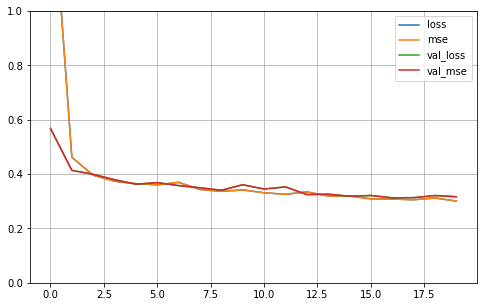

In [52]:
# 配置
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
history = model.fit(x_train_scaled, y_train, validation_data=(x_valid_scaled, y_valid),
         epochs=20)
# 定义画图的函数
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
plot_learning_curves(history)

# 手动实现超参数搜索

In [53]:
# 搜索最佳学习率
learning_rates = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
histories = []
for lr in learning_rates:
    model = keras.models.Sequential([
        keras.layers.Dense(30, activation='relu', input_shape=x_train.shape[1:]),
        keras.layers.Dense(1)
    ])
    optimizer = keras.optimizers.SGD(lr)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])
    callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]
    history = model.fit(x_train_scaled, y_train,
                       validation_data=(x_valid_scaled, y_valid),
                       epochs=100,
                       callbacks=callbacks)
    histories.append(history)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 3.0153 - mse: 3.0153 - val_loss: 2.5369 - val_mse: 2.5369
Epoch 2/100
363/363 [==============================] - 0s 990us/step - loss: 2.2109 - mse: 2.2109 - val_loss: 1.9069 - val_mse: 1.9069
Epoch 3/100
363/363 [==============================] - 0s 953us/step - loss: 1.7248 - mse: 1.7248 - val_loss: 1.5265 - val_mse: 1.5265
Epoch 4/100
363/363 [==============================] - 0s 945us/step - loss: 1.4152 - mse: 1.4152 - val_loss: 1.2882 - val_mse: 1.2882
Epoch 5/100
363/363 [==============================] - 0s 968us/step - loss: 1.2129 - mse: 1.2129 - val_loss: 1.1345 - val_mse: 1.1345
Epoch 6/100
363/363 [==============================] - 0s 984us/step - loss: 1.0793 - mse: 1.0793 - val_loss: 1.0371 - val_mse: 1.0371
Epoch 7/100
363/363 [==============================] - 0s 961us/step - loss: 0.9901 - mse: 0.9901 - val_loss: 0.9747 - val_mse: 0.9747
Epoch 8/100
363/363 [==============================] - 0s

363/363 [==============================] - 0s 922us/step - loss: 0.6236 - mse: 0.6236 - val_loss: 0.6786 - val_mse: 0.6786
Epoch 62/100
363/363 [==============================] - 0s 982us/step - loss: 0.6210 - mse: 0.6210 - val_loss: 0.6758 - val_mse: 0.6758
Epoch 63/100
363/363 [==============================] - 0s 949us/step - loss: 0.6184 - mse: 0.6184 - val_loss: 0.6730 - val_mse: 0.6730
Epoch 64/100
363/363 [==============================] - 0s 930us/step - loss: 0.6159 - mse: 0.6159 - val_loss: 0.6702 - val_mse: 0.6702
Epoch 65/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6134 - mse: 0.6134 - val_loss: 0.6675 - val_mse: 0.6675
Epoch 66/100
363/363 [==============================] - 0s 924us/step - loss: 0.6109 - mse: 0.6109 - val_loss: 0.6648 - val_mse: 0.6648
Epoch 67/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6084 - mse: 0.6084 - val_loss: 0.6621 - val_mse: 0.6621
Epoch 68/100
363/363 [==============================] - 0s 1ms/st

363/363 [==============================] - 0s 853us/step - loss: 0.5926 - mse: 0.5926 - val_loss: 0.6438 - val_mse: 0.6438
Epoch 23/100
363/363 [==============================] - 0s 917us/step - loss: 0.5873 - mse: 0.5873 - val_loss: 0.6379 - val_mse: 0.6379
Epoch 24/100
363/363 [==============================] - 0s 920us/step - loss: 0.5822 - mse: 0.5822 - val_loss: 0.6323 - val_mse: 0.6323
Epoch 25/100
363/363 [==============================] - 0s 913us/step - loss: 0.5773 - mse: 0.5773 - val_loss: 0.6269 - val_mse: 0.6269
Epoch 26/100
363/363 [==============================] - 0s 931us/step - loss: 0.5725 - mse: 0.5725 - val_loss: 0.6215 - val_mse: 0.6215
Epoch 27/100
363/363 [==============================] - 0s 917us/step - loss: 0.5679 - mse: 0.5679 - val_loss: 0.6166 - val_mse: 0.6166
Epoch 28/100
363/363 [==============================] - 0s 893us/step - loss: 0.5634 - mse: 0.5634 - val_loss: 0.6114 - val_mse: 0.6114
Epoch 29/100
363/363 [==============================] - 0s 90

363/363 [==============================] - 0s 847us/step - loss: 0.4662 - mse: 0.4662 - val_loss: 0.4908 - val_mse: 0.4908
Epoch 18/100
363/363 [==============================] - 0s 821us/step - loss: 0.4619 - mse: 0.4619 - val_loss: 0.4871 - val_mse: 0.4871
Epoch 19/100
363/363 [==============================] - 0s 845us/step - loss: 0.4584 - mse: 0.4584 - val_loss: 0.4829 - val_mse: 0.4829
Epoch 20/100
363/363 [==============================] - 0s 869us/step - loss: 0.4546 - mse: 0.4546 - val_loss: 0.4785 - val_mse: 0.4785
Epoch 21/100
363/363 [==============================] - 0s 821us/step - loss: 0.4517 - mse: 0.4517 - val_loss: 0.4750 - val_mse: 0.4750
Epoch 22/100
363/363 [==============================] - 0s 832us/step - loss: 0.4491 - mse: 0.4491 - val_loss: 0.4719 - val_mse: 0.4719
Epoch 23/100
363/363 [==============================] - 0s 834us/step - loss: 0.4459 - mse: 0.4459 - val_loss: 0.4690 - val_mse: 0.4690
Epoch 24/100
363/363 [==============================] - 0s 86

363/363 [==============================] - 0s 876us/step - loss: 0.3817 - mse: 0.3817 - val_loss: 0.3900 - val_mse: 0.3900
Epoch 9/100
363/363 [==============================] - 0s 873us/step - loss: 0.3788 - mse: 0.3788 - val_loss: 0.3921 - val_mse: 0.3921
Epoch 10/100
363/363 [==============================] - 0s 836us/step - loss: 0.3737 - mse: 0.3737 - val_loss: 0.3873 - val_mse: 0.3873
Epoch 11/100
363/363 [==============================] - 0s 879us/step - loss: 0.3713 - mse: 0.3713 - val_loss: 0.3860 - val_mse: 0.3860
Epoch 12/100
363/363 [==============================] - 0s 842us/step - loss: 0.3689 - mse: 0.3689 - val_loss: 0.3963 - val_mse: 0.3963
Epoch 13/100
363/363 [==============================] - 0s 858us/step - loss: 0.3655 - mse: 0.3655 - val_loss: 0.3835 - val_mse: 0.3835
Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 0.6768 - mse: 0.6768 - val_loss: 0.5375 - val_mse: 0.5375
Epoch 2/100
363/363 [==============================] - 0s 905us/s

0.0001


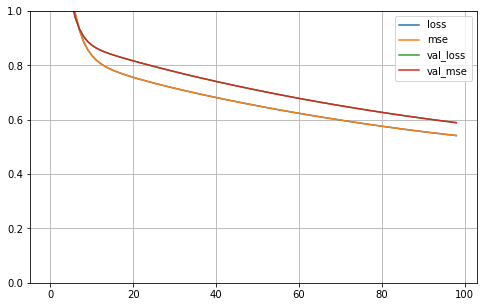

0.0003


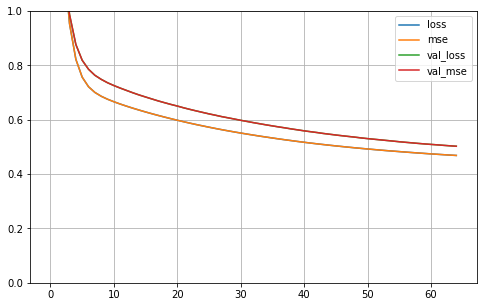

0.001


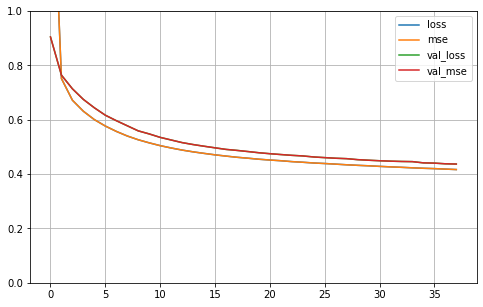

0.003


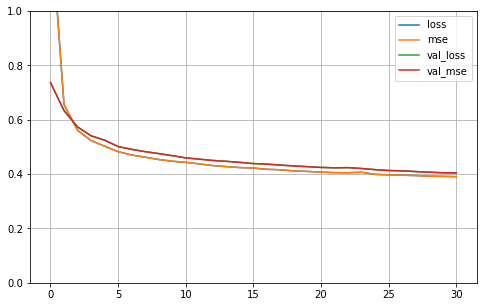

0.01


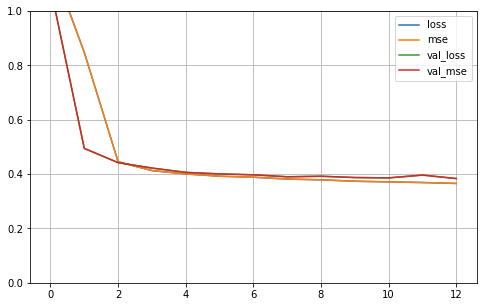

0.03


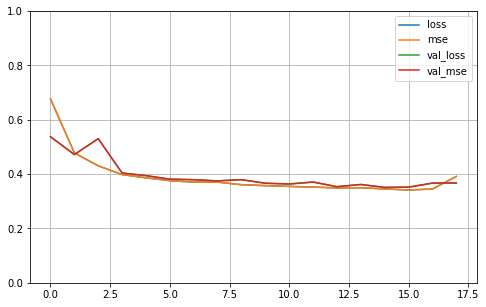

In [55]:
# 定义画图的函数
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
for lr, history in zip(learning_rates, histories):
    print(lr)
    plot_learning_curves(history)

In [54]:
histories

# 使用sklearn进行超参数搜索

In [56]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [57]:
# 搜索最佳学习率
learning_rates = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
def build_model(hidden_layers=1, layer_size=30, learning_rate=3e-3):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(layer_size, activation='relu', input_shape=x_train.shape[1:]))
    for _ in range(hidden_layers - 1):
        model.add(keras.layers.Dense(layer_size, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

sklearn_model = KerasRegressor(build_fn=build_model)

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_14232/3162357811.py:13: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  sklearn_model = KerasRegressor(build_fn=build_model)


In [58]:
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)]
history = sklearn_model.fit(x_train_scaled, y_train,
                           epochs=10,
                           validation_data=(x_valid_scaled, y_valid),
                           callbacks=callbacks)

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 1.4215 - val_loss: 0.7748
Epoch 2/10
363/363 [==============================] - 0s 804us/step - loss: 0.6449 - val_loss: 0.6514
Epoch 3/10
363/363 [==============================] - 0s 813us/step - loss: 0.5770 - val_loss: 0.5940
Epoch 4/10
363/363 [==============================] - 0s 795us/step - loss: 0.5290 - val_loss: 0.5469
Epoch 5/10
363/363 [==============================] - 0s 830us/step - loss: 0.5006 - val_loss: 0.5279
Epoch 6/10
363/363 [==============================] - 0s 822us/step - loss: 0.4781 - val_loss: 0.5008
Epoch 7/10
363/363 [==============================] - 0s 777us/step - loss: 0.4630 - val_loss: 0.4946
Epoch 8/10
363/363 [==============================] - 0s 782us/step - loss: 0.4517 - val_loss: 0.4860
Epoch 9/10
363/363 [==============================] - 0s 811us/step - loss: 0.4432 - val_loss: 0.4589
Epoch 10/10
363/363 [==============================] - 0s 851us/step - loss: 0.4338 

In [59]:
# 使用sklearn的网格搜索, 或者随机搜索
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [60]:
params = {
    'learning_rate': [ 3e-3],
    'hidden_layers' : [2, 3, 4, 5],
    'layer_size': [20, 60, 100]
}

gv = GridSearchCV(sklearn_model, param_grid=params, n_jobs=1, cv=5, verbose=1)

In [61]:
gv.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
73/73 [==============================] - 0s 768us/step - loss: 0.6132


363/363 [==============================] - 1s 866us/step - loss: 1.0095


GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x000001BDA9EB5070>,
             n_jobs=1,
             param_grid={'hidden_layers': [2, 3, 4, 5],
                         'layer_size': [20, 60, 100],
                         'learning_rate': [0.003]},
             verbose=1)

In [62]:
# 最佳得分
print(gv.best_score_)
# 最佳参数   
print(gv.best_params_)
# 最佳模型
print(gv.best_estimator_)

-0.610117506980896
{'hidden_layers': 5, 'layer_size': 100, 'learning_rate': 0.003}


0.0001


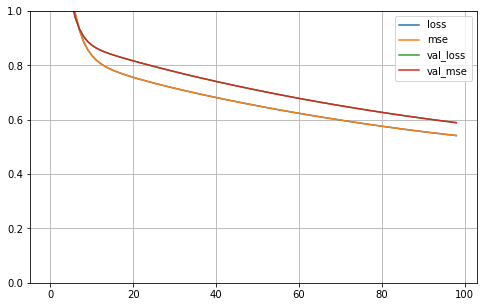

0.0003


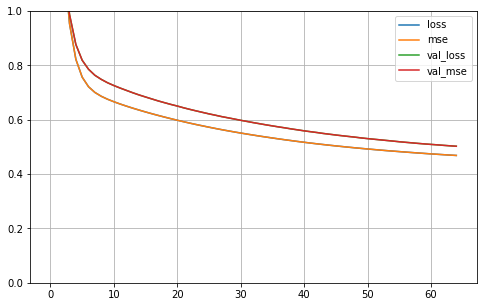

0.001


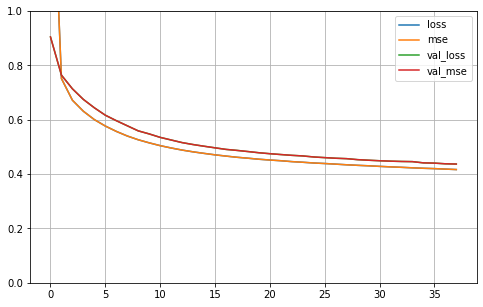

0.003


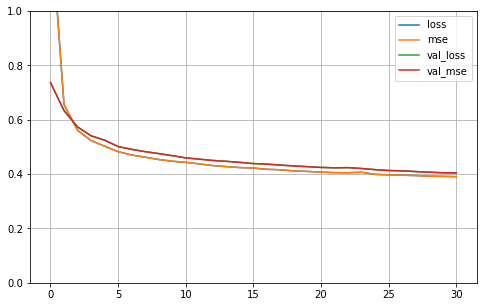

0.01


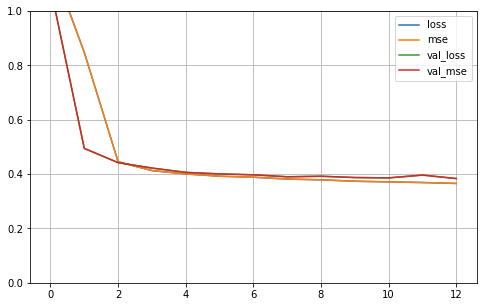

0.03


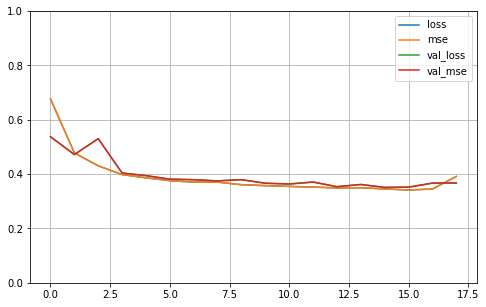

In [63]:
# 定义画图的函数
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
for lr, history in zip(learning_rates, histories):
    print(lr)
    plot_learning_curves(history)